In [ ]:
import pandas as pd 

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC

Bài 1. Đọc dữ liệu từ file cvs. Loại bỏ giá trị rỗng, chuẩn hóa dữ liệu. Chia tỉ lệ train test 50-50

(213, 8)
Original dataset shape Counter({0: 76, 1: 76, 2: 76, 3: 76, 4: 76, 5: 76})
tong so cot sau khi SMOTE  :  (456, 8)


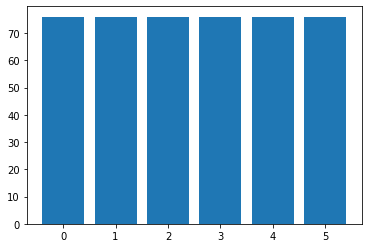

In [ ]:
df = pd.read_csv( 'glass.csv', ) 
df.fillna(df.mean(), inplace=True)

X = df.values[:, :-2] 
y = df.values[:, -1] 
y = LabelEncoder().fit_transform(y)

print(X.shape)
# X_train.sample(frac=3, replace=True, random_state=100)

sm = SMOTE(random_state=30)
X_res, y_res = sm.fit_resample(X, y )
print('Original dataset shape %s' % Counter(y_res))
print("tong so cot sau khi SMOTE  : ",X_res.shape)


from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)


from matplotlib import pyplot 
pyplot.bar(Counter(y_res).keys(), Counter(y_res).values())
pyplot.show()




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(  
X_res, y_res, test_size = 0.5,) 
X_train.shape

(228, 8)

Bài 2:  Sử dụng Logistic để phân lớp. Hiện thị kết quả độ chính xác

In [ ]:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train,y_train)

y_pred = clf.predict(X_test)
print (accuracy_score(y_test,y_pred))
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test,y_pred)
print(confusion_matrix1)


0.7017543859649122
              precision    recall  f1-score   support

           0       0.44      0.62      0.52        39
           1       0.67      0.29      0.40        42
           2       0.50      0.51      0.51        39
           3       0.85      1.00      0.92        29
           4       0.89      0.97      0.93        40
           5       0.95      0.92      0.94        39

    accuracy                           0.70       228
   macro avg       0.72      0.72      0.70       228
weighted avg       0.71      0.70      0.69       228

[[24  4 11  0  0  0]
 [13 12  9  5  2  1]
 [17  2 20  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 39  1]
 [ 0  0  0  0  3 36]]


D:\Phan mem\pyp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bài 3: Sử dụng thuật toán kết hợp của LogisticRegressionm, SVC, DecisionTreeClassifier với hard vote .Hiện thị kết quả độ chính xác

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
estimator = []
estimator.append(('LR',
                  LogisticRegression(solver ='lbfgs',
                                     multi_class ='multinomial',
                                     max_iter = 20000)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)

print (accuracy_score(y_test,y_pred))
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test,y_pred)
print(confusion_matrix1)

0.8245614035087719
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        39
           1       0.80      0.48      0.60        42
           2       0.70      0.90      0.79        39
           3       0.97      1.00      0.98        29
           4       0.98      1.00      0.99        40
           5       1.00      0.95      0.97        39

    accuracy                           0.82       228
   macro avg       0.84      0.84      0.83       228
weighted avg       0.83      0.82      0.82       228

[[27  3  9  0  0  0]
 [14 20  6  1  1  0]
 [ 4  0 35  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 40  0]
 [ 0  2  0  0  0 37]]
